# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [ ]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 368


## Group Number : 10

## Student 1 
### Name : Yuan Tian
### ID : 5816971

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
df = pd.read_csv('cda-lab-1-credit-card-fraud/train_data.csv')

In [41]:
# remove NAN and duplicates
df.drop_duplicates(subset=None, keep='first', inplace=False)
df.dropna(axis=0, how='any', subset=None, inplace=False)


,Id,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
0,1,GB,mccredit,546097,4500,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0
1,2,GB,mcdebit,557349,3395,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0
2,3,GB,mccredit,542011,3895,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0
3,4,GB,visadebit,465943,15345,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0
4,6,GB,visadebit,475127,5095,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189623,237030,GB,mccredit,522948,10900,GBP,GB,Ecommerce,True,1,UKAccount,email280066,ip306841,card8293,0
189624,237031,GB,visadebit,475128,1895,GBP,GB,Ecommerce,True,1,UKAccount,email7034,ip90856,card219132,0
189625,237032,GB,visadebit,475130,3195,GBP,GB,Ecommerce,True,1,UKAccount,email230246,ip49940,card106460,0
189626,237034,GB,visadebit,475130,7895,GBP,GB,Ecommerce,True,1,UKAccount,email18542,ip303467,card18871,0


In [43]:
# fix attributetype error
df['issuercountrycode'] = df['issuercountrycode'].astype(str)
df['shoppercountrycode'] = df['shoppercountrycode'].astype(str)
df['cardverificationcodesupplied'] = df['cardverificationcodesupplied'].astype(str)

In [44]:
# normalize the amount according to its currency

# Define currency exchange rates
exchange_rates = {
    'USD': 1.0,
    'GBP': 1.42, # sample exchange rate
    'AUD': 0.73,
  'SEK': 0.12,
  'MXN': 0.049,
'NZD': 0.65
}

# Define a function to normalize amount to USD
def normalize_amount(row):
    currency_code = row['currencycode']
    amount = row['amount']
    exchange_rate = exchange_rates[currency_code]
    return amount / exchange_rate

# Apply the function to the amount column
df['amount'] = df.apply(normalize_amount, axis=1)

# Print the first 5 rows of the new column
print(df['amount'].head())

0     3169.014085
1     2390.845070
2     2742.957746
3    10806.338028
4     3588.028169
Name: amount, dtype: float64


In [45]:
benign_data = df[df['label'] == 0]
fraud_data = df[df['label'] == 1]

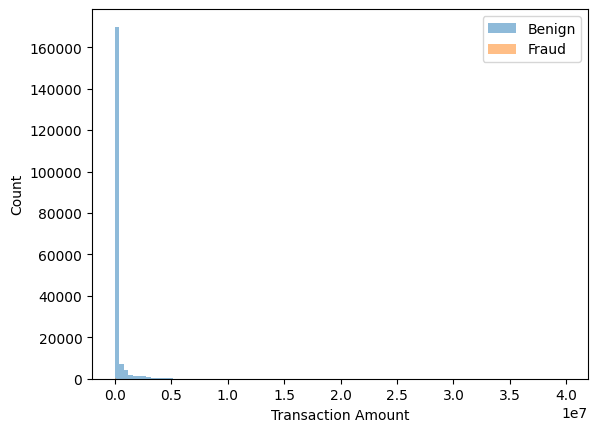

In [22]:
# histogram + amount


plt.hist(benign_data['amount'], bins=100, alpha=0.5, label='Benign')
plt.hist(fraud_data['amount'], bins=100, alpha=0.5, label='Fraud')
plt.legend(loc='upper right')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

In [46]:
# select features
features = list(df.columns)
index = [1,2,3,4,5,6,7,8,9,10]
features = [features[i] for i in index]
features

['issuercountrycode',
 'txvariantcode',
 'bin',
 'amount',
 'currencycode',
 'shoppercountrycode',
 'shopperinteraction',
 'cardverificationcodesupplied',
 'cvcresponsecode',
 'accountcode']

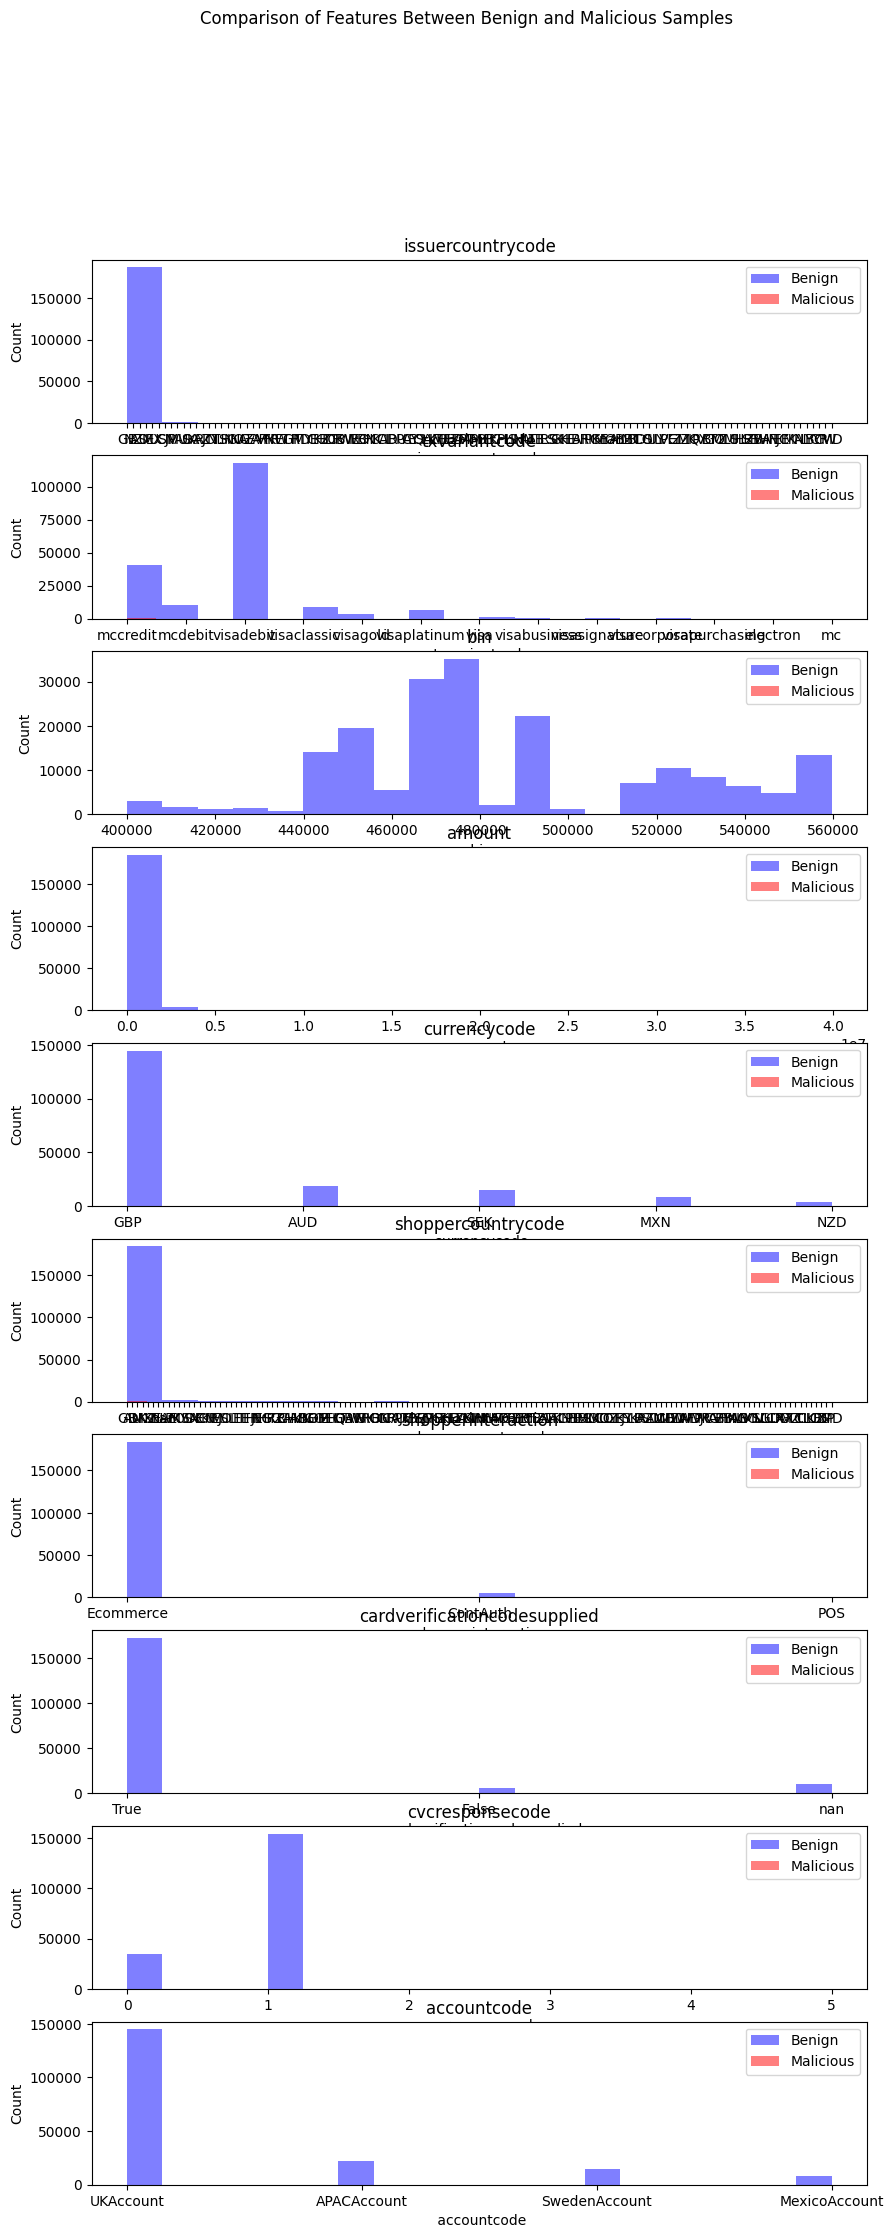

In [47]:
n_features = len(features)

# # Set up the figure and subplots
# fig, axs = plt.subplots(n_features, 2, figsize=(10, 25))
#
# # Loop over each feature and plot the histograms for benign and malicious samples
# for i in range(n_features):
#     axs[i, 0].hist(benign_data[features[i]], bins=20, alpha=0.15, color='blue', label='Benign')
#     axs[i, 1].hist(fraud_data[features[i]], bins=20, alpha=1, color='red', label='Malicious')
#     axs[i, 0].legend()
#     axs[i, 1].legend()
#     axs[i, 0].set_xlabel(' {}'.format(features[i]))
#     axs[i, 1].set_xlabel(' {}'.format(features[i]))
#     axs[i, 0].set_ylabel('Count')
#     axs[i, 1].set_ylabel('Count')
#     axs[i, 0].set_title(features[i])
#     axs[i, 1].set_title(features[i])

fig, axs = plt.subplots(n_features, 1, figsize=(10, 25))
# Loop over each feature and plot the histograms for benign and malicious samples
for i in range(n_features):
    axs[i].hist(benign_data[features[i]], bins=20, alpha=0.5, color='blue', label='Benign')
    axs[i].hist(fraud_data[features[i]], bins=20, alpha=0.5, color='red', label='Malicious')
    axs[i].legend()
    axs[i].set_xlabel(' {}'.format(features[i]))
    axs[i].set_ylabel('Count')
    axs[i].set_title(features[i])

# Add a title to the figure
fig.suptitle('Comparison of Features Between Benign and Malicious Samples')

# Display the figure
plt.show()


In [63]:
import numpy as np
df_heatmap = df.pivot_table(values='label',index='txvariantcode',columns='accountcode',aggfunc=sum)
sns.heatmap(df_heatmap,annot=True)
plt.show()

MemoryError: Unable to allocate 751. MiB for an array with shape (24592589, 4) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000019823197760> (for post_execute):


MemoryError: Unable to allocate 188. MiB for an array with shape (24592589,) and data type float64

MemoryError: Unable to allocate 188. MiB for an array with shape (24592589,) and data type float64

<Figure size 640x480 with 2 Axes>

In [57]:
grouped

,,Id,bin,amount,cvcresponsecode,label
ip_id,mail_id,,,,,
ip1000,email166780,56344,535316,36986.301370,0,0
ip100002,email39664,109325,465859,6123.239437,1,0
ip100003,email210503,85347,465941,4366.197183,1,0
ip100004,email141845,17102,465858,1126.760563,1,0
ip100006,email33097,45456,475130,5633.802817,1,0
...,...,...,...,...,...,...
ip99993,email252271,8505,446291,3975.352113,1,0
ip99994,email13132,52851,475130,1267.605634,1,0
ip99995,email163581,66744,446238,7042.253521,1,0


issuercountrycode
txvariantcode
bin
amount
shoppercountrycode
shopperinteraction
cardverificationcodesupplied
cvcresponsecode
accountcode


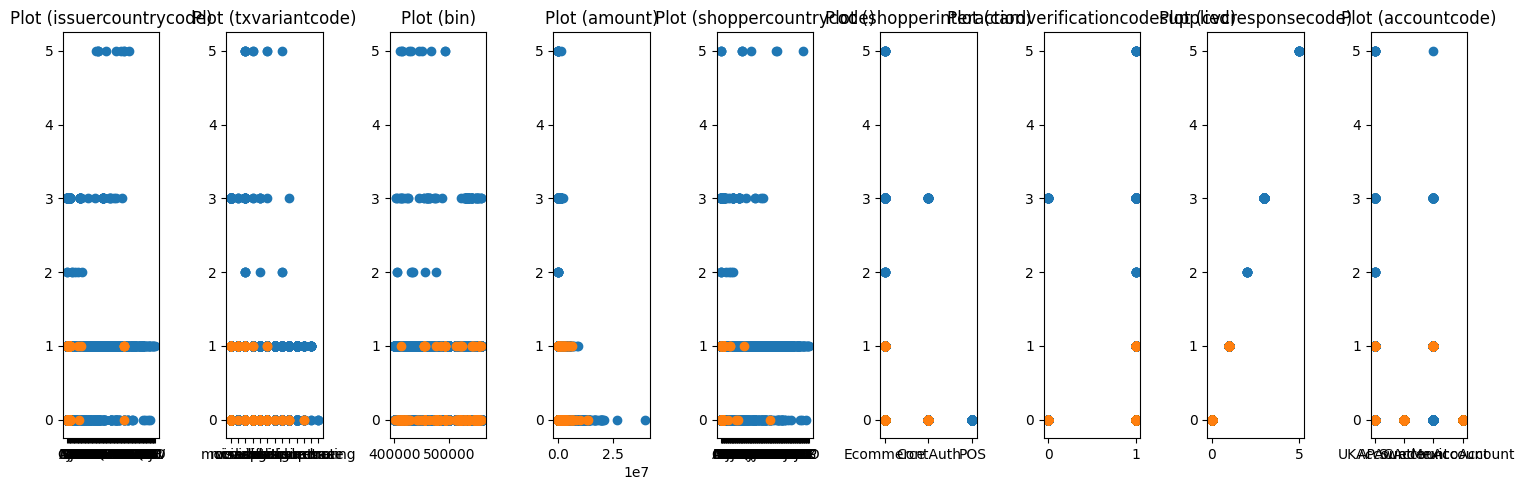

In [ ]:

n = len(features)
fig, axs = plt.subplots(n, 1, figsize=(15, 5))

invariant = 'cvcresponsecode'
for i in range(n):
      ax = axs[i]
      print(features[i])
      ax.scatter(df[df['label'] == 0][features[i]], df[df['label'] == 0][invariant], label='Benign')
      ax.scatter(df[df['label'] == 1][features[i]], df[df['label'] == 1][invariant], label='Fraudulent')
      ax.set_title(f"Plot ({features[i]})")
        
plt.tight_layout()
plt.show()

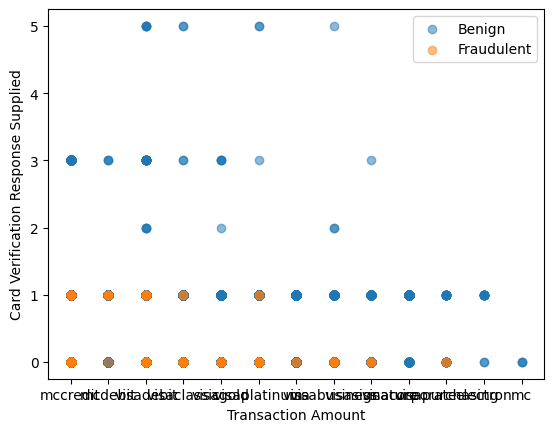

In [ ]:

# Create scatter plot
feature1 = 'txvariantcode'  
plt.scatter(df[df['label'] == 0]['txvariantcode'], df[df['label'] == 0]['cvcresponsecode'], alpha=0.5, label='Benign')
plt.scatter(df[df['label'] == 1]['txvariantcode'], df[df['label'] == 1]['cvcresponsecode'], alpha=0.5, label='Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Card Verification Response Supplied')
plt.legend()
plt.show()


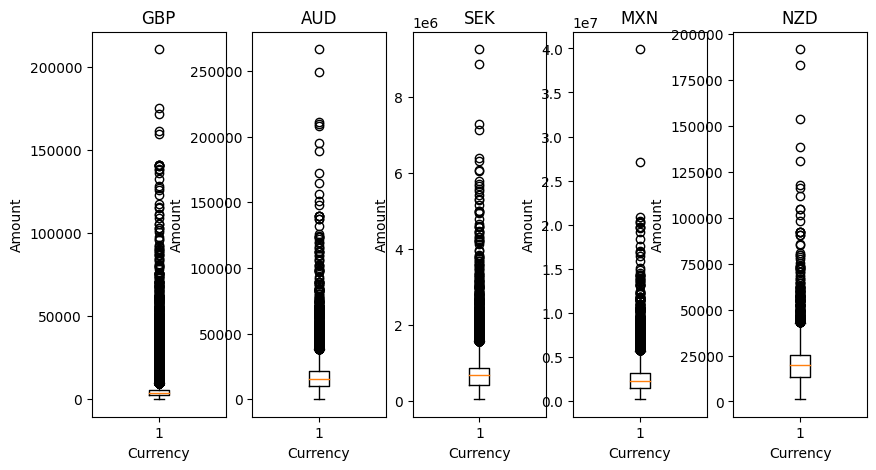

In [ ]:
# currency + boxplot
import matplotlib.pyplot as plt

currency = list(df['currencycode'].unique())
n = len(currency)
fig, axs = plt.subplots(1, len(currency), figsize=(10, 5))

for i in range(n):
      ax = axs[i]
      # Plot the box plot
      f = df[df['currencycode']==currency[i]]
      ax.boxplot(f['amount'])

      ax.set_xlabel('Currency')
      ax.set_ylabel('Amount')
      ax.set_title(currency[i])
plt.show()


### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below